# Task 1: Data Analysis

"Segment the dataset and draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers."

Learning points
- data segmentation
- data visualization

### Primary Analysis

In [1]:
# importing required modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# reading the provided data into dataframe

data = pd.read_excel("ANZ.xlsx")

In [3]:
data.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
# validating if 100 unique account values exist

data["account"].nunique()

100

In [5]:
# checking other parameters to explore data
data.columns.values

array(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'], dtype=object)

In [6]:
data["date"].value_counts()

2018-09-28    174
2018-08-17    172
2018-10-05    168
2018-10-17    162
2018-09-14    161
             ... 
2018-08-06     99
2018-08-20     97
2018-10-23     96
2018-10-08     95
2018-10-30     89
Name: date, Length: 91, dtype: int64

In [7]:
data["customer_id"].value_counts()

CUS-2487424745    578
CUS-2142601169    303
CUS-3026014945    292
CUS-3378712515    260
CUS-1614226872    259
                 ... 
CUS-3395687666     40
CUS-3201519139     37
CUS-1646183815     34
CUS-495599312      31
CUS-1739931018     25
Name: customer_id, Length: 100, dtype: int64

### Primary Analysis Results:

- The dataset contains transactions for 100 customers. 
- Trasactional period <01/08/2018 - 31/10/2018> (92 days).
- Columns contain missing data : assumption : nature of transaction.
- Only 91 unique dates in the dataset : missing : 16-08-2018.

### Transaction Volume Per Day

In [8]:
import warnings
warnings.filterwarnings('ignore')

In [9]:
date_group = data.groupby('date')["amount"].sum().reset_index()

In [10]:
date_group.head()

,date,amount
0,2018-08-01,29867.94
1,2018-08-02,21786.32
2,2018-08-03,38096.58
3,2018-08-04,6296.05
4,2018-08-05,4426.50


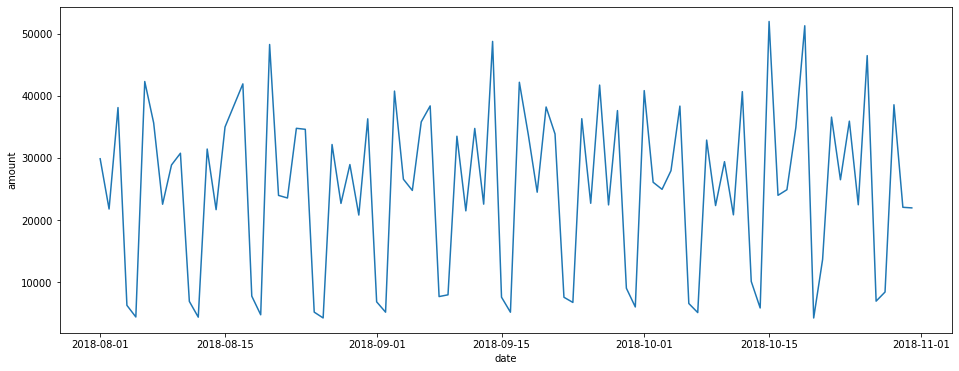

In [11]:
plt.figure(figsize = (16, 6))
sns.lineplot(y = "amount", x = "date", data = date_group)

### Mean Transaction Volume Per Day

In [12]:
date_mean = data.groupby("date")["amount"].mean().reset_index()

In [13]:
date_mean.head()

,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


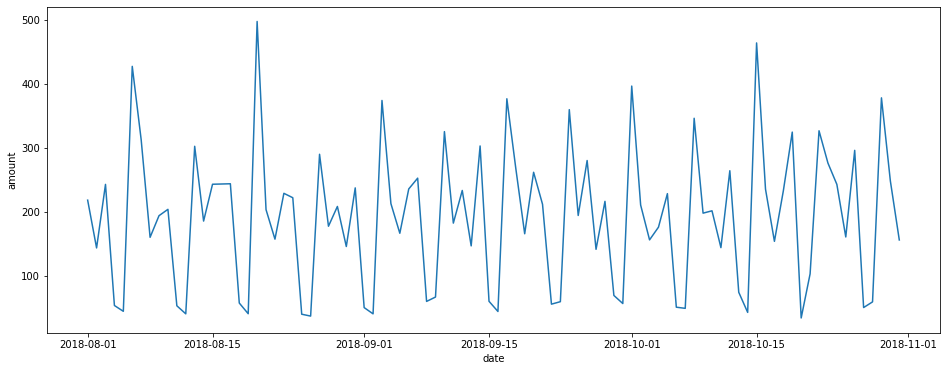

In [14]:
# plotting mean of transactions grouped by volume

plt.figure(figsize=(16, 6))
sns.lineplot(y = "amount", x = "date", data = date_mean)

### Gender Based Transation Volume

In [15]:
gender_vol = data[["date","amount","gender"]]
gender_vol.head()

,date,amount,gender
0,2018-08-01,16.25,F
1,2018-08-01,14.19,F
2,2018-08-01,6.42,M
3,2018-08-01,40.90,F
4,2018-08-01,3.25,F


In [16]:
gender_data = gender_vol.groupby(['date',"gender"])["amount"].sum().reset_index()
gender_data

,date,gender,amount
0,2018-08-01,F,13628.64
1,2018-08-01,M,16239.30
2,2018-08-02,F,5896.25
3,2018-08-02,M,15890.07
4,2018-08-03,F,17091.59
...,...,...,...
177,2018-10-29,M,22119.89
178,2018-10-30,F,11051.25
179,2018-10-30,M,11011.09
180,2018-10-31,F,13704.25


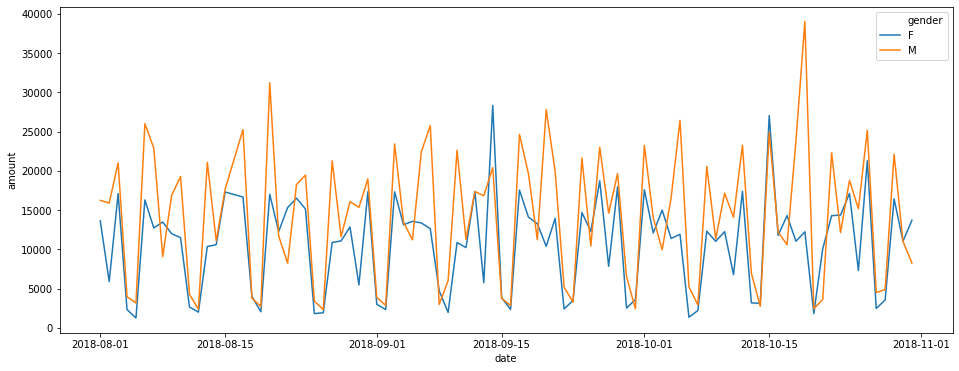

In [17]:
# line plot to show difference in transactions done by gender

plt.figure(figsize = (16, 6))
sns.lineplot(y = "amount", x = "date",
             hue = "gender", data = gender_data)

### Mean Gender Based Transation Volume

In [18]:
gender_mean = data.groupby(["date","gender"])["amount"].mean().reset_index()
gender_mean.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


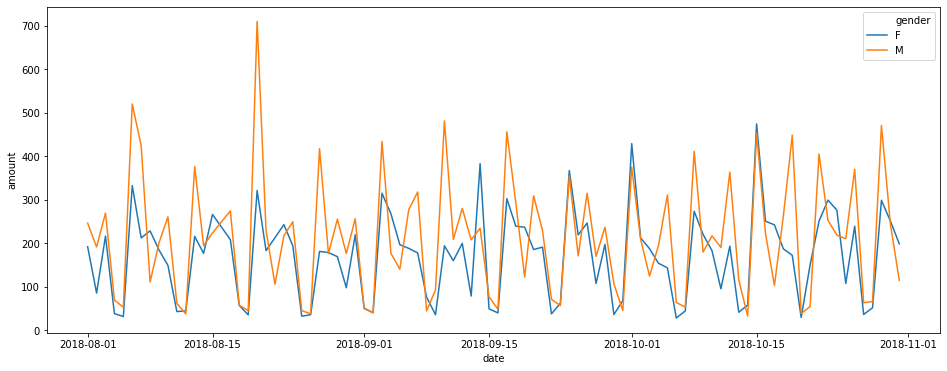

In [19]:
# plotting mean of transactions grouped by gender

plt.figure(figsize=(16, 6))
sns.lineplot(y = "amount", x = "date",
             hue = "gender", data = gender_mean)

### Transaction Volume by State

In [20]:
#Transaction volume sorted by states

merchant_state = data.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


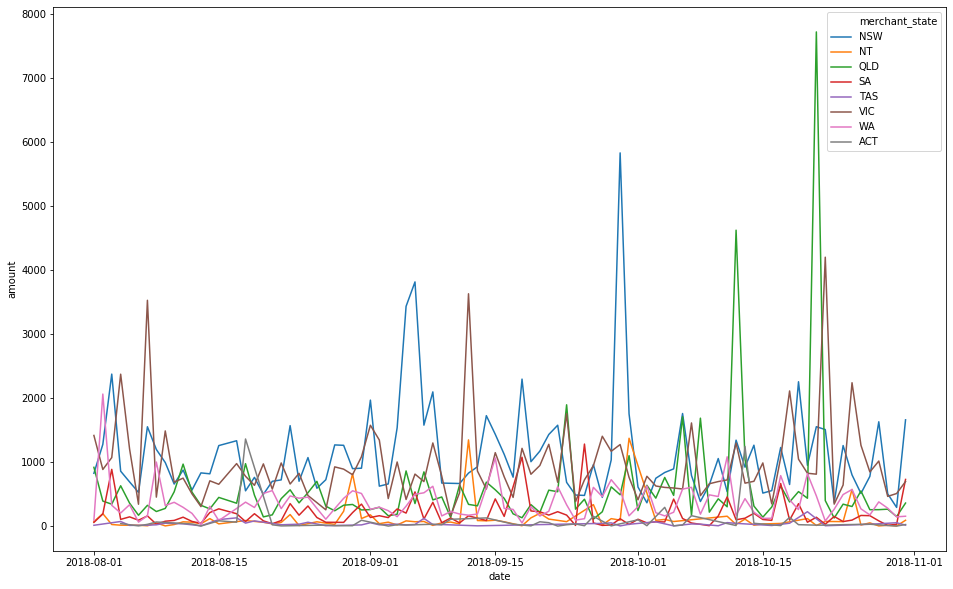

In [21]:
#Lineplot for transation volume per state

plt.figure(figsize = (16, 10))
sns.lineplot(y = "amount", x = "date",
             hue = "merchant_state", data = merchant_state)

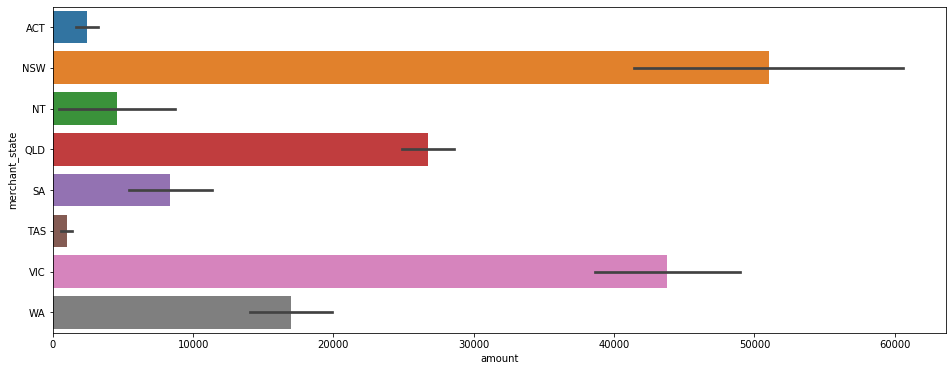

In [22]:
# state based transaction barplot

merchant_state_total = data.groupby(["merchant_state","gender"])["amount"].sum().reset_index()
#merchant_state_total.head()

plt.figure(figsize = (16, 6))
sns.barplot(x = "amount", y = "merchant_state",
            data = merchant_state_total)

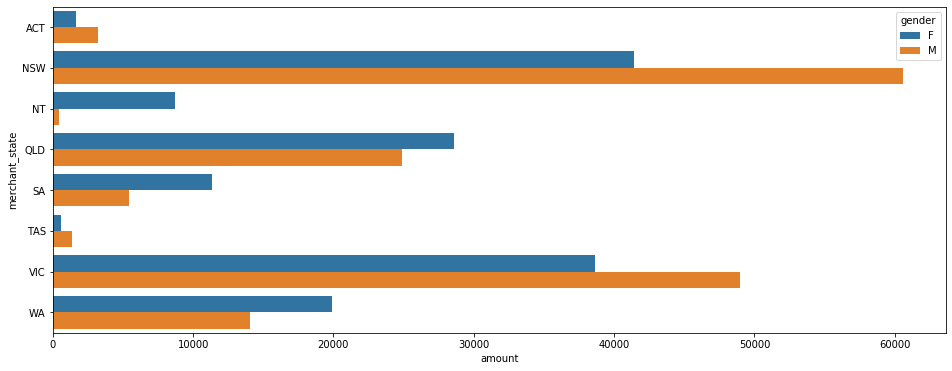

In [23]:
# state based transaction barplot (gender)

plt.figure(figsize = (16, 6))
sns.barplot(x = "amount", y = "merchant_state",
            hue = "gender", data = merchant_state_total)

### Mean Transaction Volume by State

In [24]:
merchant_state_mean = data.groupby(["date","merchant_state"])["amount"].mean().reset_index()
merchant_state_mean.head()

,date,merchant_state,amount
0,2018-08-01,NSW,29.584286
1,2018-08-01,NT,24.416667
2,2018-08-01,QLD,54.221176
3,2018-08-01,SA,15.592500
4,2018-08-01,TAS,17.130000


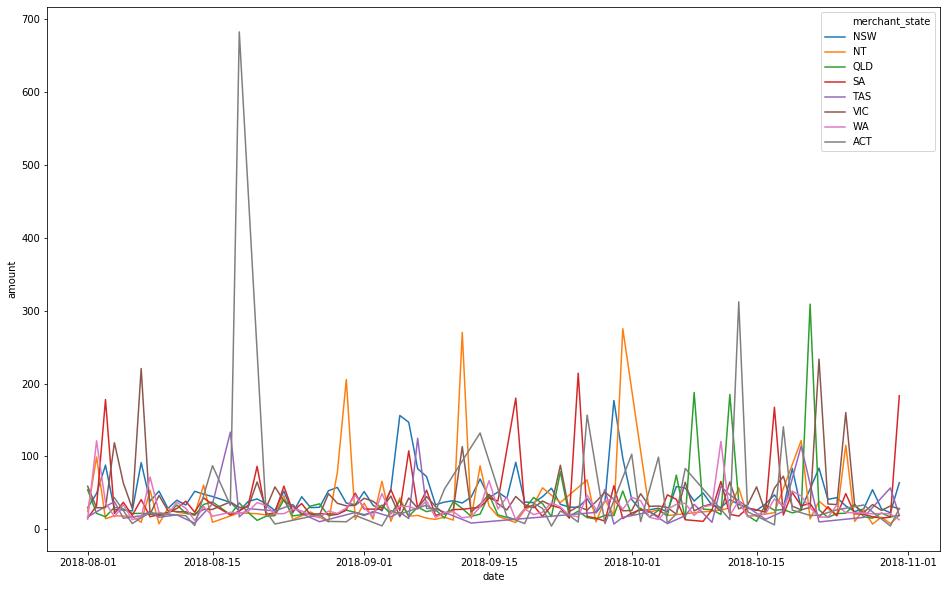

In [25]:
plt.figure(figsize=(16, 10))
sns.lineplot(y = "amount", x = "date",
             hue = "merchant_state", data = merchant_state_mean)

### Account Balance Analysis

In [26]:
# Taking account balance sum over the dates

acc_bal_total= data.groupby(["date",'gender'])["balance"].sum().reset_index()
acc_bal_total.head()

,date,gender,balance
0,2018-08-01,F,619748.69
1,2018-08-01,M,741205.93
2,2018-08-02,F,707846.59
3,2018-08-02,M,1414623.33
4,2018-08-03,F,296789.02


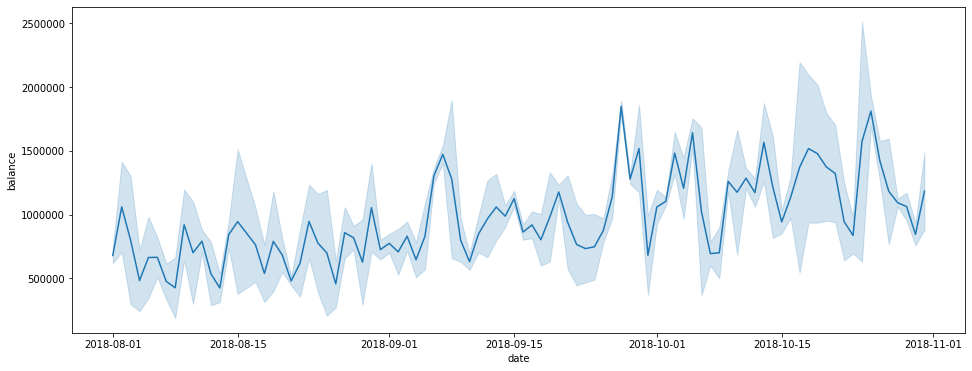

In [27]:
# Plot for balance over dates

plt.figure(figsize=(16, 6))
sns.lineplot(y = "balance", x = "date",data = acc_bal_total)

In [28]:
# Mean account balance of all customers
acc_bal_mean= data.groupby(["date",'gender'])["balance"].mean().reset_index()
acc_bal_mean.head()

,date,gender,balance
0,2018-08-01,F,8728.854789
1,2018-08-01,M,11230.392879
2,2018-08-02,F,10258.646232
3,2018-08-02,M,17043.654578
4,2018-08-03,F,3756.823038


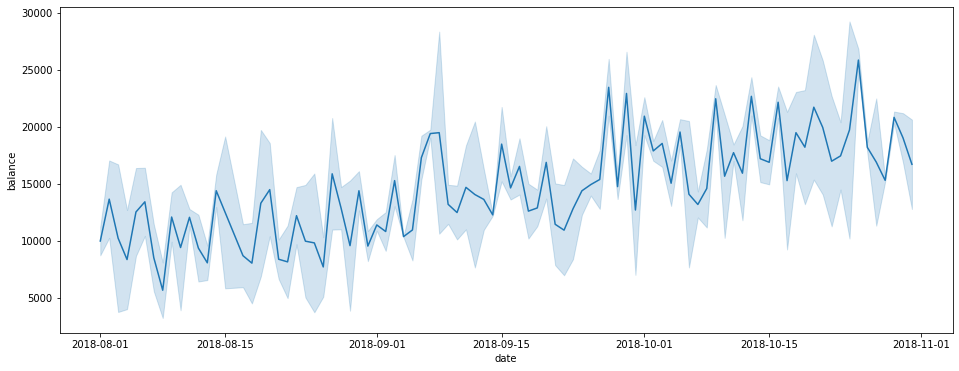

In [29]:
plt.figure(figsize=(16, 6))
sns.lineplot(y = "balance", x = "date", data = acc_bal_mean)

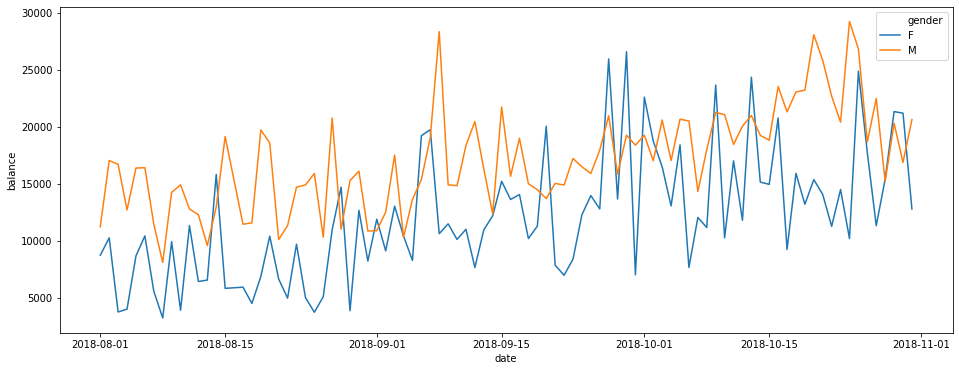

In [30]:
# Mean difference between genders

plt.figure(figsize=(16, 6))
sns.lineplot(y = "balance", x = "date", hue = "gender", data = acc_bal_mean)

In [31]:
#Mean account balance over the states

acc_bal_state_mean= data.groupby(["date",'merchant_state'])["balance"].mean().reset_index()
acc_bal_state_mean.head()

,date,merchant_state,balance
0,2018-08-01,NSW,3570.146429
1,2018-08-01,NT,366.056667
2,2018-08-01,QLD,5459.165294
3,2018-08-01,SA,5728.495000
4,2018-08-01,TAS,6924.650000


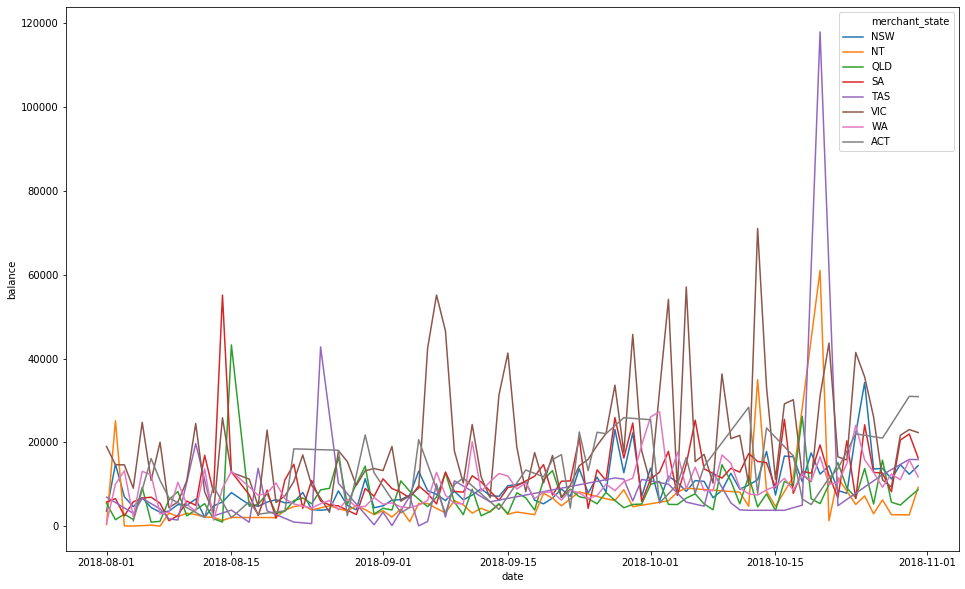

In [32]:
plt.figure(figsize=(16, 10))
sns.lineplot(y = "balance", x = "date", hue = "merchant_state", data = acc_bal_state_mean)

In [34]:
# Mean account balance over the states

acc_bal_state= data.groupby(['merchant_state',"gender"])["balance"].mean().reset_index()
acc_bal_state.head()

,merchant_state,gender,balance
0,ACT,F,14433.733913
1,ACT,M,9176.572593
2,NSW,F,8855.846765
3,NSW,M,9936.826013
4,NT,F,4730.673850


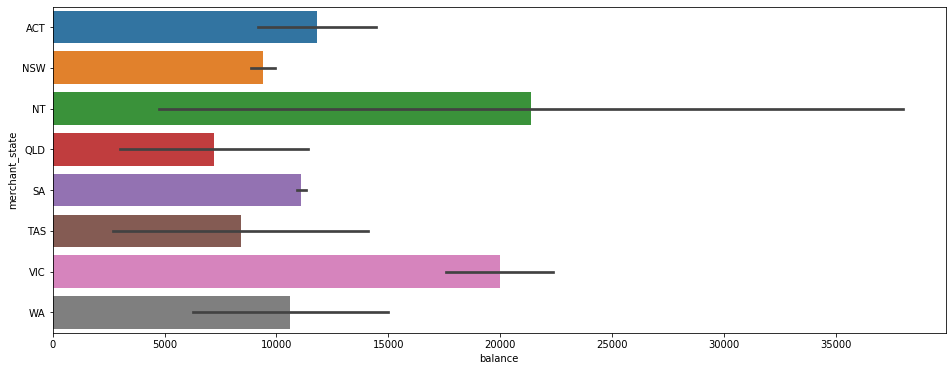

In [35]:
#Barplot for the mean account balance by state

plt.figure(figsize=(16, 6))
sns.barplot(x = "balance", y = "merchant_state", data = acc_bal_state)

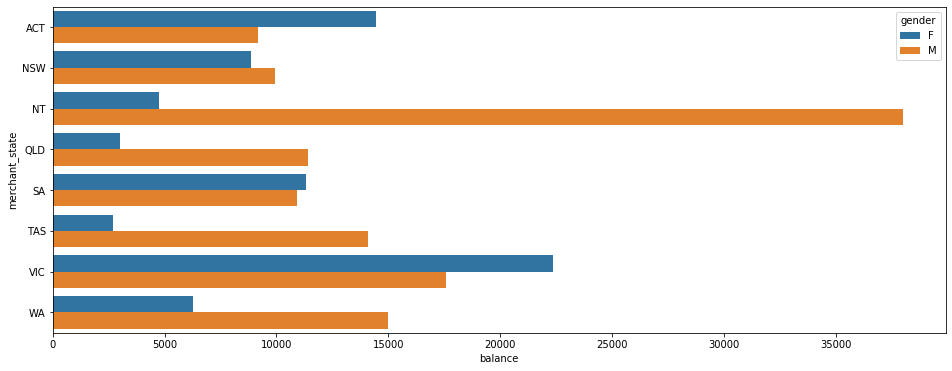

In [36]:
plt.figure(figsize=(16, 6))
sns.barplot(x = "balance", y = "merchant_state", hue = "gender",  data = acc_bal_state)

### Total Transaction by Age